# MSCA 32009  Health Analytics
## Assignment 1 - Diabetes Prediction
## Jack Gao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import os

In [3]:
path = "/Users/Xingkang/Desktop/UChicago/Quarter 2/MSCA 32009 Health Analytics/Assignment 1/datasetPracticeFusionDiabetes"

In [4]:
os.chdir(path)

In [5]:
test_data = pd.read_csv("test_SyncPatient.csv")
Smoking_Status = pd.read_csv('SyncSmokingStatus.csv')
Condition = pd.read_csv('SyncCondition.csv')
Patient = pd.read_csv('training_SyncPatient.csv')
Allergy = pd.read_csv('training_SyncAllergy.csv')
Diagnosis = pd.read_csv('training_SyncDiagnosis.csv')
Immunization = pd.read_csv('training_SyncImmunization.csv')
Lab_Observation = pd.read_csv('training_SyncLabObservation.csv')
Lab_Panel = pd.read_csv('training_SyncLabPanel.csv')
Lab_Result = pd.read_csv('training_SyncLabResult.csv')
Medication = pd.read_csv('training_SyncMedication.csv')
Patient_Orig = pd.read_csv('training_SyncPatient_orig.csv')
Patient_Condition = pd.read_csv('training_SyncPatientCondition.csv')
Patient_Smoking = pd.read_csv('training_SyncPatientSmokingStatus.csv')
Prescription = pd.read_csv('training_SyncPrescription.csv')
Transcript = pd.read_csv('training_SyncTranscript.csv')
Transcript_Allergy = pd.read_csv('training_SyncTranscriptAllergy.csv') #Only 801 entries
Transcript_Diagnosis = pd.read_csv('training_SyncTranscriptDiagnosis.csv') #267928 entries
Transcript_Medication = pd.read_csv('training_SyncTranscriptMedication.csv')#97109 entries

In [6]:
Patient.shape

(9871, 6)

In [7]:
Patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientGuid   6600 non-null   object 
 1   DMIndicator   6600 non-null   float64
 2   Gender        6600 non-null   object 
 3   YearOfBirth   6600 non-null   float64
 4   State         6600 non-null   object 
 5   PracticeGuid  6600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 462.8+ KB


In [8]:
test_data = test_data[6600:]

In [9]:
test_data

,PatientGuid,Gender,YearOfBirth,State,PracticeGuid
6600,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712
6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0
6602,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898
6603,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4
6604,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA
...,...,...,...,...,...
9943,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A,F,1978,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
9944,5845977A-3014-4301-92B3-FFF0A2EBBAD2,F,1986,WA,EADEC07A-9901-411F-BBE3-04376029E1E8
9945,F948403A-ABE6-496D-B37D-FFF9A9D79767,F,1955,CA,57B6F75F-CF0A-4225-BAD0-8222A7D4B489
9946,F764BC86-0CFA-4661-8D84-FFFA8E2B6080,F,1960,CA,1A69F223-8409-4FDC-A26C-114677D2D4C3


In [10]:
test_data.reset_index(inplace=True)

In [11]:
test_data

,index,PatientGuid,Gender,YearOfBirth,State,PracticeGuid
0,6600,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712
1,6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0
2,6602,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898
3,6603,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4
4,6604,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA
...,...,...,...,...,...,...
3343,9943,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A,F,1978,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
3344,9944,5845977A-3014-4301-92B3-FFF0A2EBBAD2,F,1986,WA,EADEC07A-9901-411F-BBE3-04376029E1E8
3345,9945,F948403A-ABE6-496D-B37D-FFF9A9D79767,F,1955,CA,57B6F75F-CF0A-4225-BAD0-8222A7D4B489
3346,9946,F764BC86-0CFA-4661-8D84-FFFA8E2B6080,F,1960,CA,1A69F223-8409-4FDC-A26C-114677D2D4C3


In [12]:
Patient.isnull().sum()

PatientGuid     3271
DMIndicator     3271
Gender          3271
YearOfBirth     3271
State           3271
PracticeGuid    3271
dtype: int64

In [13]:
Patient.dropna(inplace=True)

In [14]:
Patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientGuid   6600 non-null   object 
 1   DMIndicator   6600 non-null   float64
 2   Gender        6600 non-null   object 
 3   YearOfBirth   6600 non-null   float64
 4   State         6600 non-null   object 
 5   PracticeGuid  6600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 360.9+ KB


## 1. Examine Patient_Smoking Table & Remove Duplicates

In [15]:
Patient_Smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PatientSmokingStatusGuid  4940 non-null   object
 1   PatientGuid               4940 non-null   object
 2   SmokingStatusGuid         4940 non-null   object
 3   EffectiveYear             4940 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 154.5+ KB


In [16]:
Patient_Smoking['PatientGuid'].value_counts() # 4427 Patients represented

035B92F2-92DC-4F6E-90BF-80479138DB90    6
29E1267B-AFCB-44D3-9E25-37042668B1B7    6
2C40C416-8EF6-437A-9A8A-8D7E267E3F1B    5
E3A3716D-A110-45AE-A696-5B04B5086CE7    5
1A631272-6857-4025-AFDD-3A995C7EBEC8    5
                                       ..
1853B14A-437D-4A24-B340-8FFB261EC368    1
AEBD2FEF-0D55-45E4-9EEF-AECF25781C31    1
E3809C6C-0BF5-4414-B489-87A34750D218    1
A7539B4D-B455-45DC-A6DD-1F34A0251232    1
23E8A1CB-D3B2-4FDF-91BC-1C4B12564D94    1
Name: PatientGuid, Length: 4427, dtype: int64

In [17]:
Patient_Smoking.sort_values(by='EffectiveYear',inplace=True)

In [18]:
Patient_Smoking.drop_duplicates(subset=['PatientGuid'],keep='last',inplace=True)

In [19]:
Patient_Smoking['PatientGuid'].value_counts()

5465F577-72DF-4CA9-BBFC-1FF94BD2489A    1
C765A529-D748-41FB-A752-3B8D884B43A7    1
ADF1859E-33E8-4E25-A727-6F68FBCB9822    1
CC99AF65-3386-4BC5-B4A0-945259B24869    1
BFDCCBF9-BB0A-4870-9C46-E1BA06C9F6F3    1
                                       ..
1F8D7B39-0D68-42F5-8DC4-82F35ABF3331    1
8BEC8659-BA97-48F4-B8F6-17F735B0BB1E    1
C53D1EA1-9B42-48BF-A463-249C10037F6C    1
E2E2C782-631F-4DD4-AAE7-8A05AF0A0400    1
23E8A1CB-D3B2-4FDF-91BC-1C4B12564D94    1
Name: PatientGuid, Length: 4427, dtype: int64

In [20]:
df1 = Patient.merge(Patient_Smoking,on='PatientGuid',how='left')

In [21]:
df1 = df1.merge(Smoking_Status,on='SmokingStatusGuid',how='left')

In [22]:
test1 = test_data.merge(Patient_Smoking,on='PatientGuid',how='left')

In [23]:
test1 = test1.merge(Smoking_Status,on='SmokingStatusGuid',how='left')

In [24]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 3347
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3348 non-null   int64  
 1   PatientGuid               3348 non-null   object 
 2   Gender                    3348 non-null   object 
 3   YearOfBirth               3348 non-null   int64  
 4   State                     3348 non-null   object 
 5   PracticeGuid              3348 non-null   object 
 6   PatientSmokingStatusGuid  1506 non-null   object 
 7   SmokingStatusGuid         1506 non-null   object 
 8   EffectiveYear             1506 non-null   float64
 9   Description               1506 non-null   object 
 10  NISTcode                  1506 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 313.9+ KB


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientGuid               6600 non-null   object 
 1   DMIndicator               6600 non-null   float64
 2   Gender                    6600 non-null   object 
 3   YearOfBirth               6600 non-null   float64
 4   State                     6600 non-null   object 
 5   PracticeGuid              6600 non-null   object 
 6   PatientSmokingStatusGuid  2921 non-null   object 
 7   SmokingStatusGuid         2921 non-null   object 
 8   EffectiveYear             2921 non-null   float64
 9   Description               2921 non-null   object 
 10  NISTcode                  2921 non-null   float64
dtypes: float64(4), object(7)
memory usage: 618.8+ KB


In [26]:
df1['Description'].value_counts()

0 cigarettes per day (non-smoker or less than 100 in lifetime)    1240
Not a current tobacco user                                         761
0 cigarettes per day (previous smoker)                             446
Up to 1 pack per day                                               253
Few (1-3) cigarettes per day                                        91
1-2 packs per day                                                   60
Current Tobacco user                                                47
Current status unknown                                              14
2 or more packs per day                                              9
Name: Description, dtype: int64

In [27]:
df1[df1['DMIndicator']==1]['Description'].value_counts()

0 cigarettes per day (non-smoker or less than 100 in lifetime)    223
Not a current tobacco user                                        182
0 cigarettes per day (previous smoker)                            119
Up to 1 pack per day                                               43
Few (1-3) cigarettes per day                                       13
1-2 packs per day                                                  11
Current Tobacco user                                                5
2 or more packs per day                                             2
Current status unknown                                              1
Name: Description, dtype: int64

In [28]:
df1[df1['DMIndicator']==0]['Description'].value_counts()

0 cigarettes per day (non-smoker or less than 100 in lifetime)    1017
Not a current tobacco user                                         579
0 cigarettes per day (previous smoker)                             327
Up to 1 pack per day                                               210
Few (1-3) cigarettes per day                                        78
1-2 packs per day                                                   49
Current Tobacco user                                                42
Current status unknown                                              13
2 or more packs per day                                              7
Name: Description, dtype: int64

In [29]:
df1[['Description','DMIndicator']].groupby(['Description']).mean().sort_values(by='DMIndicator',ascending=False)

,DMIndicator
Description,
0 cigarettes per day (previous smoker),0.266816
Not a current tobacco user,0.239159
2 or more packs per day,0.222222
1-2 packs per day,0.183333
0 cigarettes per day (non-smoker or less than 100 in lifetime),0.179839
Up to 1 pack per day,0.169960
Few (1-3) cigarettes per day,0.142857
Current Tobacco user,0.106383
Current status unknown,0.071429


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

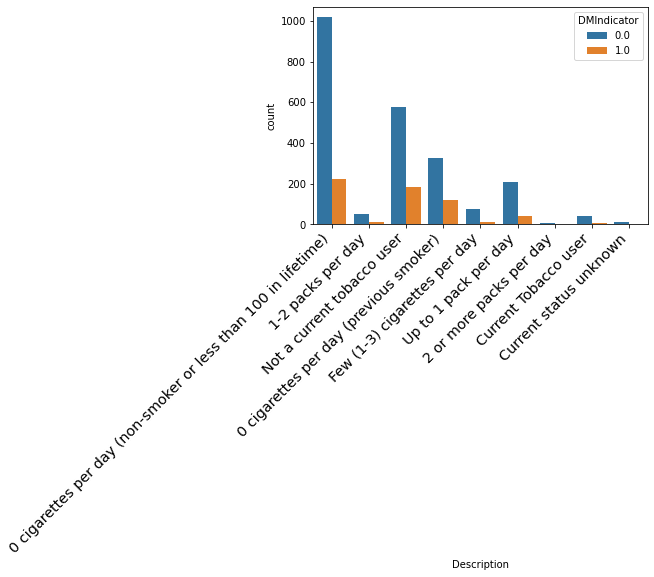

In [30]:
sns.countplot(x=df1['Description'],hue=df1['DMIndicator'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [31]:
map1 = {'Current status unknown':1,'0 cigarettes per day (non-smoker or less than 100 in lifetime)':0,'Not a current tobacco user':0,'0 cigarettes per day (previous smoker)':0,'Few (1-3) cigarettes per day':1,'Up to 1 pack per day':2,'1-2 packs per day':3,'2 or more packs per day':4,'Current Tobacco user':2,}

In [32]:
map1

{'Current status unknown': 1,
 '0 cigarettes per day (non-smoker or less than 100 in lifetime)': 0,
 'Not a current tobacco user': 0,
 '0 cigarettes per day (previous smoker)': 0,
 'Few (1-3) cigarettes per day': 1,
 'Up to 1 pack per day': 2,
 '1-2 packs per day': 3,
 '2 or more packs per day': 4,
 'Current Tobacco user': 2}

In [33]:
for dataset in df1:
    df1['Smoking_Ordinal'] = df1['Description'].map(map1)

In [34]:
for dataset in test1:
    test1['Smoking_Ordinal'] = test1['Description'].map(map1)

In [35]:
df1['Smoking_Ordinal'].fillna(0,inplace=True)

In [36]:
df1['Smoking_Ordinal'].value_counts()

0.0    6126
2.0     300
1.0     105
3.0      60
4.0       9
Name: Smoking_Ordinal, dtype: int64

In [37]:
test1['Smoking_Ordinal'].fillna(0,inplace=True)

In [38]:
test1['Smoking_Ordinal'].value_counts()

0.0    3096
2.0     178
1.0      43
3.0      26
4.0       5
Name: Smoking_Ordinal, dtype: int64

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientGuid               6600 non-null   object 
 1   DMIndicator               6600 non-null   float64
 2   Gender                    6600 non-null   object 
 3   YearOfBirth               6600 non-null   float64
 4   State                     6600 non-null   object 
 5   PracticeGuid              6600 non-null   object 
 6   PatientSmokingStatusGuid  2921 non-null   object 
 7   SmokingStatusGuid         2921 non-null   object 
 8   EffectiveYear             2921 non-null   float64
 9   Description               2921 non-null   object 
 10  NISTcode                  2921 non-null   float64
 11  Smoking_Ordinal           6600 non-null   float64
dtypes: float64(5), object(7)
memory usage: 990.3+ KB


In [40]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3348 non-null   int64  
 1   PatientGuid               3348 non-null   object 
 2   Gender                    3348 non-null   object 
 3   YearOfBirth               3348 non-null   int64  
 4   State                     3348 non-null   object 
 5   PracticeGuid              3348 non-null   object 
 6   PatientSmokingStatusGuid  1506 non-null   object 
 7   SmokingStatusGuid         1506 non-null   object 
 8   EffectiveYear             1506 non-null   float64
 9   Description               1506 non-null   object 
 10  NISTcode                  1506 non-null   float64
 11  Smoking_Ordinal           3348 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 340.0+ KB


In [41]:
Patient['Smoking'] = df1['Smoking_Ordinal']

In [42]:
Patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientGuid   6600 non-null   object 
 1   DMIndicator   6600 non-null   float64
 2   Gender        6600 non-null   object 
 3   YearOfBirth   6600 non-null   float64
 4   State         6600 non-null   object 
 5   PracticeGuid  6600 non-null   object 
 6   Smoking       6600 non-null   float64
dtypes: float64(3), object(4)
memory usage: 412.5+ KB


In [43]:
test_data['Smoking'] = test1['Smoking_Ordinal']

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3348 non-null   int64  
 1   PatientGuid   3348 non-null   object 
 2   Gender        3348 non-null   object 
 3   YearOfBirth   3348 non-null   int64  
 4   State         3348 non-null   object 
 5   PracticeGuid  3348 non-null   object 
 6   Smoking       3348 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 183.2+ KB


In [45]:
test_data['Smoking'].value_counts()

0.0    3096
2.0     178
1.0      43
3.0      26
4.0       5
Name: Smoking, dtype: int64

## 2.Examine BMI Score

In [46]:
Transcript = pd.read_csv('training_SyncTranscript.csv')
Transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131031 entries, 0 to 131030
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TranscriptGuid      131031 non-null  object 
 1   PatientGuid         131031 non-null  object 
 2   VisitYear           131031 non-null  int64  
 3   Height              60048 non-null   float64
 4   Weight              131031 non-null  float64
 5   BMI                 131031 non-null  float64
 6   SystolicBP          85580 non-null   float64
 7   DiastolicBP         85580 non-null   float64
 8   RespiratoryRate     51192 non-null   float64
 9   HeartRate           0 non-null       float64
 10  Temperature         50034 non-null   float64
 11  PhysicianSpecialty  130850 non-null  object 
 12  UserGuid            131031 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 13.0+ MB


In [47]:
Transcript['BMI'].sort_values()

65515         0.000
74515         0.000
74513         0.000
74512         0.000
74510         0.000
            ...    
14105      5595.880
4829       5811.034
58204     45850.839
64540    149739.000
41371    549746.000
Name: BMI, Length: 131031, dtype: float64

In [48]:
Transcript = Transcript[(Transcript['BMI']<60) & (Transcript['BMI']>10)] 

In [49]:
Transcript.sort_values(by='VisitYear',inplace=True)

In [50]:
Transcript.drop_duplicates(subset=['PatientGuid'],inplace=True,keep='last')

In [51]:
Transcript['PatientGuid'].value_counts()

E056B70F-608B-493F-83F2-B6B2BCCC85B3    1
8A8D5B99-4E66-4C51-8D44-8BCC54FDDD7F    1
3E45DA32-F8D0-466D-AEC3-6C8DBEFE00EC    1
6EBA33BF-DE2C-4851-B251-BA2580BB8756    1
69297D95-53A5-4D4C-B841-BB3AB9164B7F    1
                                       ..
4CD1741C-3377-4951-AB5E-4F1C17C3BC1D    1
B4641000-4571-42C3-B12A-FE792F7A8900    1
226CD885-0721-4982-ADC9-4233C8FFC1E9    1
0B5A4355-3C50-404E-B8A2-784DD72C2FA0    1
23E8A1CB-D3B2-4FDF-91BC-1C4B12564D94    1
Name: PatientGuid, Length: 9947, dtype: int64

In [52]:
Transcript['BMI'].isnull().sum()

0

In [53]:
for dataset in Transcript:
    Transcript.loc[Transcript['BMI']<=18.5,'BMI_New']=0
    Transcript.loc[(Transcript['BMI']>18.5) & (Transcript['BMI']<=25),'BMI_New']=1
    Transcript.loc[(Transcript['BMI']>25) & (Transcript['BMI']<=30),'BMI_New']=2
    Transcript.loc[(Transcript['BMI']>30) & (Transcript['BMI']<=40),'BMI_New']=3
    Transcript.loc[Transcript['BMI']>40,'BMI_New']=4

In [54]:
Transcript.loc[Transcript['BMI']<=18.5,'BMI_New']=0
Transcript.loc[(Transcript['BMI']>18.5) & (Transcript['BMI']<=25),'BMI_New']=1
Transcript.loc[(Transcript['BMI']>25) & (Transcript['BMI']<=30),'BMI_New']=2
Transcript.loc[(Transcript['BMI']>30) & (Transcript['BMI']<=40),'BMI_New']=3
Transcript.loc[Transcript['BMI']>40,'BMI_New']=4

In [55]:
Transcript['BMI_New'].value_counts()

3.0    3359
2.0    3257
1.0    2670
4.0     509
0.0     152
Name: BMI_New, dtype: int64

In [56]:
df2 = Patient.merge(Transcript,on='PatientGuid',how='left')

In [57]:
df2['PatientGuid'].value_counts()

5465F577-72DF-4CA9-BBFC-1FF94BD2489A    1
35FA4950-1955-4712-896F-2ABCDB2160A9    1
E926346B-2BF0-4AB9-9C00-3877A300D8DD    1
2C893D4C-7B19-44AB-9DE9-9C4BCD7D4464    1
3C5D57F1-333F-42FD-BEA8-676401F81607    1
                                       ..
613C775A-7B8D-4BEE-9A6A-3113FAE14836    1
1781EA1E-C4BC-4B82-8A94-31CBEDAF7162    1
5A5FB3C4-F946-490C-B19A-A4F5DC601338    1
15769CC4-3C56-4748-AC7B-2120D04B803B    1
23E8A1CB-D3B2-4FDF-91BC-1C4B12564D94    1
Name: PatientGuid, Length: 6600, dtype: int64

In [58]:
Patient['BMI'] = df2['BMI_New']

In [59]:
Patient['BMI'].fillna(1,inplace=True)

In [60]:
Patient['BMI'].sort_values()

6599    0.0
6080    0.0
3509    0.0
2053    0.0
2054    0.0
       ... 
3075    4.0
1053    4.0
254     4.0
5771    4.0
4052    4.0
Name: BMI, Length: 6600, dtype: float64

In [61]:
test2 = test_data.merge(Transcript,on='PatientGuid',how='left')

In [62]:
test_data['BMI'] = test2['BMI_New']

In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3348 non-null   int64  
 1   PatientGuid   3348 non-null   object 
 2   Gender        3348 non-null   object 
 3   YearOfBirth   3348 non-null   int64  
 4   State         3348 non-null   object 
 5   PracticeGuid  3348 non-null   object 
 6   Smoking       3348 non-null   float64
 7   BMI           3348 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 209.4+ KB


## 3.Create Age Band

In [64]:
Patient['YearOfBirthBand'] = pd.cut(Patient['YearOfBirth'],8)
Patient[['YearOfBirthBand','DMIndicator']].groupby(['YearOfBirthBand'],as_index=False).mean().sort_values(by='YearOfBirthBand')

,YearOfBirthBand,DMIndicator
0,"(1921.928, 1931.0]",0.276000
1,"(1931.0, 1940.0]",0.351166
2,"(1940.0, 1949.0]",0.293358
3,"(1949.0, 1958.0]",0.229412
4,"(1958.0, 1967.0]",0.161965
5,"(1967.0, 1976.0]",0.086034
6,"(1976.0, 1985.0]",0.031390
7,"(1985.0, 1994.0]",0.011521


In [65]:
for dataset in Patient:
    Patient.loc[Patient['YearOfBirth']<1930,'Age']=0
    Patient.loc[(Patient['YearOfBirth']>=1930) & (Patient['YearOfBirth']<1940),'Age']=1
    Patient.loc[(Patient['YearOfBirth']>=1940) & (Patient['YearOfBirth']<1950),'Age']=2
    Patient.loc[(Patient['YearOfBirth']>=1950) & (Patient['YearOfBirth']<1960),'Age']=3
    Patient.loc[(Patient['YearOfBirth']>=1960) & (Patient['YearOfBirth']<1970),'Age']=4
    Patient.loc[(Patient['YearOfBirth']>=1970) & (Patient['YearOfBirth']<1980),'Age']=5
    Patient.loc[(Patient['YearOfBirth']>=1980) & (Patient['YearOfBirth']<1990),'Age']=6
    Patient.loc[Patient['YearOfBirth']>=1990,'Age']=7

In [66]:
for dataset in test_data:
    test_data.loc[test_data['YearOfBirth']<1930,'Age']=0
    test_data.loc[(test_data['YearOfBirth']>=1930) & (test_data['YearOfBirth']<1940),'Age']=1
    test_data.loc[(test_data['YearOfBirth']>=1940) & (test_data['YearOfBirth']<1950),'Age']=2
    test_data.loc[(test_data['YearOfBirth']>=1950) & (test_data['YearOfBirth']<1960),'Age']=3
    test_data.loc[(test_data['YearOfBirth']>=1960) & (test_data['YearOfBirth']<1970),'Age']=4
    test_data.loc[(test_data['YearOfBirth']>=1970) & (test_data['YearOfBirth']<1980),'Age']=5
    test_data.loc[(test_data['YearOfBirth']>=1980) & (test_data['YearOfBirth']<=1990),'Age']=6
    test_data.loc[test_data['YearOfBirth']>1990,'Age']=7

## 4.Create Gender Mapping

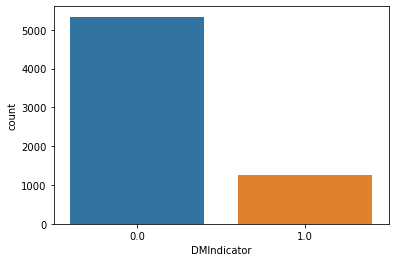

In [67]:
sns.countplot(x=Patient['DMIndicator'])

# The data is biased towards datapoints having outcome values as 0

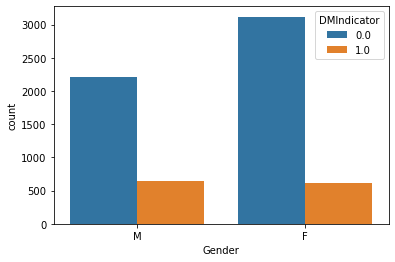

In [68]:
sns.countplot(x=Patient['Gender'],hue=Patient['DMIndicator'])

In [69]:
Patient[['Gender','DMIndicator']].groupby(['Gender']).mean().sort_values(by='DMIndicator',ascending=False)
# Gender doesn't seem to make a difference; Males might be slightly more likely to get Diabetes 

,DMIndicator
Gender,
M,0.226336
F,0.165373


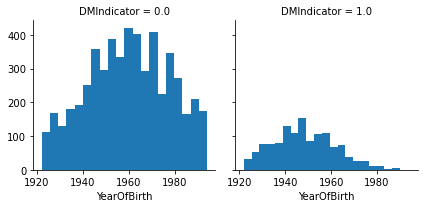

In [70]:
g = sns.FacetGrid(Patient,col='DMIndicator')
g.map(plt.hist,'YearOfBirth',bins=20) 
# We need to band age groups

In [71]:
Patient['Gender'] = Patient['Gender'].map({'M':0,'F':1})

In [72]:
test_data['Gender'] = test_data['Gender'].map({'M':0,'F':1})

In [73]:
Patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PatientGuid      6600 non-null   object  
 1   DMIndicator      6600 non-null   float64 
 2   Gender           6600 non-null   int64   
 3   YearOfBirth      6600 non-null   float64 
 4   State            6600 non-null   object  
 5   PracticeGuid     6600 non-null   object  
 6   Smoking          6600 non-null   float64 
 7   BMI              6600 non-null   float64 
 8   YearOfBirthBand  6600 non-null   category
 9   Age              6600 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 842.5+ KB


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3348 non-null   int64  
 1   PatientGuid   3348 non-null   object 
 2   Gender        3348 non-null   int64  
 3   YearOfBirth   3348 non-null   int64  
 4   State         3348 non-null   object 
 5   PracticeGuid  3348 non-null   object 
 6   Smoking       3348 non-null   float64
 7   BMI           3348 non-null   float64
 8   Age           3348 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 235.5+ KB


## 5. Examine Patient's Medication

In [75]:
Medication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44520 entries, 0 to 44519
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedicationGuid      44520 non-null  object 
 1   PatientGuid         44520 non-null  object 
 2   NdcCode             44520 non-null  int64  
 3   MedicationName      44382 non-null  object 
 4   MedicationStrength  44393 non-null  object 
 5   Schedule            5127 non-null   float64
 6   DiagnosisGuid       44520 non-null  object 
 7   UserGuid            44520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.7+ MB


In [76]:
Medication['PatientGuid'].nunique()

9846

In [77]:
Patient[Patient['DMIndicator']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 7 to 6591
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PatientGuid      1266 non-null   object  
 1   DMIndicator      1266 non-null   float64 
 2   Gender           1266 non-null   int64   
 3   YearOfBirth      1266 non-null   float64 
 4   State            1266 non-null   object  
 5   PracticeGuid     1266 non-null   object  
 6   Smoking          1266 non-null   float64 
 7   BMI              1266 non-null   float64 
 8   YearOfBirthBand  1266 non-null   category
 9   Age              1266 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 100.6+ KB


In [78]:
df3 = Patient[Patient['DMIndicator']==1].merge(Medication,on='PatientGuid',how='left')

In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 7048
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PatientGuid         7049 non-null   object  
 1   DMIndicator         7049 non-null   float64 
 2   Gender              7049 non-null   int64   
 3   YearOfBirth         7049 non-null   float64 
 4   State               7049 non-null   object  
 5   PracticeGuid        7049 non-null   object  
 6   Smoking             7049 non-null   float64 
 7   BMI                 7049 non-null   float64 
 8   YearOfBirthBand     7049 non-null   category
 9   Age                 7049 non-null   float64 
 10  MedicationGuid      6987 non-null   object  
 11  NdcCode             6987 non-null   float64 
 12  MedicationName      6912 non-null   object  
 13  MedicationStrength  6919 non-null   object  
 14  Schedule            535 non-null    float64 
 15  DiagnosisGuid       6987 non-null   ob

In [80]:
df4 = df3.drop_duplicates(subset=['PatientGuid','MedicationName'])

In [81]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6623 entries, 0 to 7048
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PatientGuid         6623 non-null   object  
 1   DMIndicator         6623 non-null   float64 
 2   Gender              6623 non-null   int64   
 3   YearOfBirth         6623 non-null   float64 
 4   State               6623 non-null   object  
 5   PracticeGuid        6623 non-null   object  
 6   Smoking             6623 non-null   float64 
 7   BMI                 6623 non-null   float64 
 8   YearOfBirthBand     6623 non-null   category
 9   Age                 6623 non-null   float64 
 10  MedicationGuid      6561 non-null   object  
 11  NdcCode             6561 non-null   float64 
 12  MedicationName      6507 non-null   object  
 13  MedicationStrength  6513 non-null   object  
 14  Schedule            497 non-null    float64 
 15  DiagnosisGuid       6561 non-null   ob

In [82]:
df4['MedicationName'].value_counts()/len(df4)

Lisinopril oral tablet                                              0.030047
Lipitor (atorvastatin) oral tablet                                  0.018874
Simvastatin oral tablet                                             0.017817
Zocor (simvastatin) oral tablet                                     0.014948
Norvasc (amLODIPine) oral tablet                                    0.011928
                                                                      ...   
Niferex-150 (obsolete2) (iron polysaccharide) oral capsule          0.000151
Phenergan (promethazine) rectal suppository                         0.000151
Mestinon Timespan (pyridostigmine) oral tablet, extended release    0.000151
Oruvail (ketoprofen) oral capsule, extended release                 0.000151
Carafate (sucralfate) oral tablet                                   0.000151
Name: MedicationName, Length: 1130, dtype: float64

In [83]:
df9 = Patient[Patient['DMIndicator']==0].merge(Medication,on='PatientGuid',how='left')
df10 = df9.drop_duplicates(subset=['PatientGuid','MedicationName'])
df10['MedicationName'].value_counts()/len(df10)

Lisinopril oral tablet                                       0.015594
Zithromax Z-Pak (azithromycin) oral tablet                   0.014409
Augmentin (amoxicillin-clavulanate) oral tablet              0.011660
Lipitor (atorvastatin) oral tablet                           0.010996
Simvastatin oral tablet                                      0.010665
                                                               ...   
Doc-Q-Lax (docusate-senna) oral tablet                       0.000047
Plan B (levonorgestrel) oral tablet                          0.000047
Mag 64 (magnesium chloride) oral tablet, extended release    0.000047
Amerge (naratriptan) oral tablet                             0.000047
Salagen (pilocarpine) oral tablet                            0.000047
Name: MedicationName, Length: 2012, dtype: float64

In [84]:
df5 = df4.groupby(by='MedicationName')

In [85]:
medlist1 = list(df5.get_group('Lisinopril oral tablet')['PatientGuid'])
dfm1 = pd.DataFrame({'PatientGuid':medlist1,'Med1':1})
Patient = Patient.merge(dfm1,on='PatientGuid',how='left')

In [86]:
medlist2 = list(df5.get_group('Lipitor (atorvastatin) oral tablet')['PatientGuid'])
dfm2 = pd.DataFrame({'PatientGuid':medlist2,'Med2':1})
Patient = Patient.merge(dfm2,on='PatientGuid',how='left')

In [87]:
medlist3 = list(df5.get_group('Simvastatin oral tablet')['PatientGuid'])
dfm3 = pd.DataFrame({'PatientGuid':medlist3,'Med3':1})
Patient = Patient.merge(dfm3,on='PatientGuid',how='left')

In [88]:
medlist4 = list(df5.get_group('Zocor (simvastatin) oral tablet')['PatientGuid'])
dfm4 = pd.DataFrame({'PatientGuid':medlist4,'Med4':1})
Patient = Patient.merge(dfm4,on='PatientGuid',how='left')

In [89]:
medlist5 = list(df5.get_group('Norvasc (amLODIPine) oral tablet')['PatientGuid'])
dfm5 = pd.DataFrame({'PatientGuid':medlist5,'Med5':1})
Patient = Patient.merge(dfm5,on='PatientGuid',how='left')

In [90]:
Patient[['Med1','Med2','Med3','Med4','Med5']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Med1    199 non-null    float64
 1   Med2    125 non-null    float64
 2   Med3    118 non-null    float64
 3   Med4    99 non-null     float64
 4   Med5    79 non-null     float64
dtypes: float64(5)
memory usage: 309.4 KB


In [91]:
Patient.replace(np.NaN,0,inplace=True)

In [92]:
Patient

,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid,Smoking,BMI,YearOfBirthBand,Age,Med1,Med2,Med3,Med4,Med5
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,0,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,0.0,1.0,"(1921.928, 1931.0]",0.0,0.0,0.0,0.0,0.0,0.0
1,C6746626-6783-4650-A58F-00065649139A,0.0,1,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,0.0,2.0,"(1976.0, 1985.0]",6.0,0.0,0.0,0.0,0.0,0.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,1,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32,0.0,3.0,"(1976.0, 1985.0]",6.0,0.0,0.0,0.0,0.0,0.0
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,0,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,3.0,3.0,"(1958.0, 1967.0]",3.0,0.0,0.0,0.0,0.0,0.0
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,1,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401,0.0,3.0,"(1985.0, 1994.0]",7.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,83492E15-745E-4A3E-A05E-A737E5088CEB,0.0,0,1925.0,CA,DD0D8C67-1F38-4BFE-A54E-191AB0C66FCA,0.0,1.0,"(1921.928, 1931.0]",0.0,0.0,0.0,0.0,0.0,0.0
6596,9CAE08C1-F6E4-4B9A-A1D4-A7392CF5159B,0.0,0,1969.0,CA,7AFFC5D8-05B5-405E-9A9F-8D18190A5FEF,0.0,1.0,"(1967.0, 1976.0]",4.0,0.0,0.0,0.0,0.0,0.0
6597,FEF04377-E07A-4389-9493-A749165D8D78,0.0,1,1958.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,0.0,3.0,"(1949.0, 1958.0]",3.0,0.0,0.0,0.0,0.0,0.0
6598,052D137A-DFB2-4806-9434-A74A54A46E14,0.0,0,1956.0,FL,6373C626-559A-40B5-9936-AEEE8B4CAB5E,0.0,3.0,"(1949.0, 1958.0]",3.0,0.0,0.0,0.0,0.0,0.0


In [93]:
test_data

,index,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,Smoking,BMI,Age
0,6600,027AC271-0852-4DDD-99C2-A74FE50066E0,1,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,0.0,3.0,5.0
1,6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,1,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,0.0,3.0,2.0
2,6602,1F4D1486-7632-4576-AC92-A760680D1DC9,0,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,0.0,2.0,1.0
3,6603,0F6AD971-F133-4BD7-B508-A76788D9C46C,0,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,0.0,3.0,3.0
4,6604,1E23496C-7AAF-4A91-AAF4-A769BD439E67,1,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
3343,9943,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A,1,1978,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,0.0,2.0,5.0
3344,9944,5845977A-3014-4301-92B3-FFF0A2EBBAD2,1,1986,WA,EADEC07A-9901-411F-BBE3-04376029E1E8,0.0,1.0,6.0
3345,9945,F948403A-ABE6-496D-B37D-FFF9A9D79767,1,1955,CA,57B6F75F-CF0A-4225-BAD0-8222A7D4B489,0.0,3.0,3.0
3346,9946,F764BC86-0CFA-4661-8D84-FFFA8E2B6080,1,1960,CA,1A69F223-8409-4FDC-A26C-114677D2D4C3,0.0,3.0,4.0


In [94]:
df6 = test_data.merge(Medication,on='PatientGuid',how='left')

In [95]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 15011
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15012 non-null  int64  
 1   PatientGuid         15012 non-null  object 
 2   Gender              15012 non-null  int64  
 3   YearOfBirth         15012 non-null  int64  
 4   State               15012 non-null  object 
 5   PracticeGuid        15012 non-null  object 
 6   Smoking             15012 non-null  float64
 7   BMI                 15012 non-null  float64
 8   Age                 15012 non-null  float64
 9   MedicationGuid      14978 non-null  object 
 10  NdcCode             14978 non-null  float64
 11  MedicationName      14928 non-null  object 
 12  MedicationStrength  14932 non-null  object 
 13  Schedule            1771 non-null   float64
 14  DiagnosisGuid       14978 non-null  object 
 15  UserGuid            14978 non-null  object 
dtypes: f

In [96]:
df7 = df6.drop_duplicates(subset=['PatientGuid','MedicationName'])

In [97]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14058 entries, 0 to 15010
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14058 non-null  int64  
 1   PatientGuid         14058 non-null  object 
 2   Gender              14058 non-null  int64  
 3   YearOfBirth         14058 non-null  int64  
 4   State               14058 non-null  object 
 5   PracticeGuid        14058 non-null  object 
 6   Smoking             14058 non-null  float64
 7   BMI                 14058 non-null  float64
 8   Age                 14058 non-null  float64
 9   MedicationGuid      14024 non-null  object 
 10  NdcCode             14024 non-null  float64
 11  MedicationName      13986 non-null  object 
 12  MedicationStrength  13988 non-null  object 
 13  Schedule            1550 non-null   float64
 14  DiagnosisGuid       14024 non-null  object 
 15  UserGuid            14024 non-null  object 
dtypes: f

In [98]:
df7

,index,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,Smoking,BMI,Age,MedicationGuid,NdcCode,MedicationName,MedicationStrength,Schedule,DiagnosisGuid,UserGuid
0,6600,027AC271-0852-4DDD-99C2-A74FE50066E0,1,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,0.0,3.0,5.0,AA9E8522-F81D-4D86-B119-51B5B4BCC706,2.470397e+08,Septra DS (sulfamethoxazole-trimethoprim) oral...,800 mg-160 mg,NaN,D37A5460-39CA-489C-9486-B919262BE49F,7511BCEC-9E46-4808-99A7-5B30778B6E84
1,6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,1,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,0.0,3.0,2.0,233164E6-541B-440A-B529-B2D2FAAE3F53,7.770871e+08,Keflex (cephalexin) oral capsule,monohydrate 500 mg,NaN,F1322DB9-9420-461E-B312-54E1B30D29CD,4628E39D-B339-4233-B217-A20112574090
2,6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,1,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,0.0,3.0,2.0,704DEB94-1D68-42A1-B255-CF9EAA3B05BB,1.680004e+08,Triamcinolone Acetonide Topical (triamcinolone...,0.1%,NaN,21FB2D37-4A4B-49BB-AEEF-BF676CC0B974,4628E39D-B339-4233-B217-A20112574090
3,6602,1F4D1486-7632-4576-AC92-A760680D1DC9,0,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,0.0,2.0,1.0,958D8914-6402-4972-8970-1B166163E044,2.470027e+08,Augmentin (amoxicillin-clavulanate) oral tablet,500 mg-125 mg,NaN,ECF9A15F-D529-4BE2-87A1-D3659D1F8839,5B23252E-23A0-466D-9E86-96561488C45C
4,6603,0F6AD971-F133-4BD7-B508-A76788D9C46C,0,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,0.0,3.0,3.0,185C24D4-BF2D-41ED-A0BA-28C1583FE13E,2.932111e+07,Paxil (PARoxetine) oral tablet,20 mg,NaN,7D8EC2F9-FF2F-4520-8490-C0E6E886B317,63F8F0D0-F707-42D2-B453-0C46BE1C15F0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15006,9947,A411D8EA-81A2-4A7F-9EF9-FFFD8ECBE91C,1,1934,NJ,6C808413-0201-4850-B906-5D2A8433A82D,0.0,2.0,1.0,AE229D2E-9841-4DBF-A6FD-A5F57290A6B8,7.803583e+07,Diovan (valsartan) oral tablet,80 mg,NaN,1121E3F9-BAD2-482A-9AF4-D70557D5405D,2F7B6534-886A-4CC7-958E-2197A1741126
15007,9947,A411D8EA-81A2-4A7F-9EF9-FFFD8ECBE91C,1,1934,NJ,6C808413-0201-4850-B906-5D2A8433A82D,0.0,2.0,1.0,2A3715F5-097C-4DF8-866B-B2929F856806,8.511970e+07,Nasonex (mometasone nasal) nasal spray,50 mcg/inh,NaN,C44D4F2F-C3E1-47F6-B8F3-B06B3CD0592B,2F7B6534-886A-4CC7-958E-2197A1741126
15008,9947,A411D8EA-81A2-4A7F-9EF9-FFFD8ECBE91C,1,1934,NJ,6C808413-0201-4850-B906-5D2A8433A82D,0.0,2.0,1.0,D11B8D64-A665-4298-AAC3-B50D1147AC51,5.295909e+10,Lyrica (pregabalin) oral capsule,50 mg,5.0,601E3F9D-08B1-482E-81CE-4F0DFF767290,2F7B6534-886A-4CC7-958E-2197A1741126
15009,9947,A411D8EA-81A2-4A7F-9EF9-FFFD8ECBE91C,1,1934,NJ,6C808413-0201-4850-B906-5D2A8433A82D,0.0,2.0,1.0,7B34C7F0-F6B8-4B48-BB50-C0020F3FD461,5.601707e+07,Coumadin (warfarin) oral tablet,2 mg,NaN,9C545CAB-8091-460C-8923-2769E19AB5E9,2F7B6534-886A-4CC7-958E-2197A1741126


In [99]:
df8 = df7.groupby(by='MedicationName')

In [100]:
test_medlist1 = list(df8.get_group('Lisinopril oral tablet')['PatientGuid'])
test_dfm1 = pd.DataFrame({'PatientGuid':test_medlist1,'Med1':1})
test_data = test_data.merge(test_dfm1,on='PatientGuid',how='left')

In [101]:
test_medlist2 = list(df8.get_group('Lipitor (atorvastatin) oral tablet')['PatientGuid'])
test_dfm2 = pd.DataFrame({'PatientGuid':test_medlist2,'Med2':1})
test_data = test_data.merge(test_dfm2,on='PatientGuid',how='left')

In [102]:
test_medlist3 = list(df8.get_group('Simvastatin oral tablet')['PatientGuid'])
test_dfm3 = pd.DataFrame({'PatientGuid':test_medlist3,'Med3':1})
test_data = test_data.merge(test_dfm3,on='PatientGuid',how='left')

In [103]:
test_medlist4 = list(df8.get_group('Zocor (simvastatin) oral tablet')['PatientGuid'])
test_dfm4 = pd.DataFrame({'PatientGuid':test_medlist4,'Med4':1})
test_data = test_data.merge(test_dfm4,on='PatientGuid',how='left')

In [104]:
test_medlist5 = list(df8.get_group('Norvasc (amLODIPine) oral tablet')['PatientGuid'])
test_dfm5 = pd.DataFrame({'PatientGuid':test_medlist5,'Med5':1})
test_data = test_data.merge(test_dfm5,on='PatientGuid',how='left')

In [105]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 3347
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3348 non-null   int64  
 1   PatientGuid   3348 non-null   object 
 2   Gender        3348 non-null   int64  
 3   YearOfBirth   3348 non-null   int64  
 4   State         3348 non-null   object 
 5   PracticeGuid  3348 non-null   object 
 6   Smoking       3348 non-null   float64
 7   BMI           3348 non-null   float64
 8   Age           3348 non-null   float64
 9   Med1          255 non-null    float64
 10  Med2          179 non-null    float64
 11  Med3          188 non-null    float64
 12  Med4          110 non-null    float64
 13  Med5          111 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 392.3+ KB


In [106]:
test_data.replace(np.NaN,0,inplace=True)

In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 3347
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3348 non-null   int64  
 1   PatientGuid   3348 non-null   object 
 2   Gender        3348 non-null   int64  
 3   YearOfBirth   3348 non-null   int64  
 4   State         3348 non-null   object 
 5   PracticeGuid  3348 non-null   object 
 6   Smoking       3348 non-null   float64
 7   BMI           3348 non-null   float64
 8   Age           3348 non-null   float64
 9   Med1          3348 non-null   float64
 10  Med2          3348 non-null   float64
 11  Med3          3348 non-null   float64
 12  Med4          3348 non-null   float64
 13  Med5          3348 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 392.3+ KB


# Model and Predict

## 1. Logistic Regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss

X = Patient[['Age','BMI','Gender','Med1','Med2','Med3','Med4','Med5']]
y = Patient[['DMIndicator']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=22,stratify=y)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1333
         1.0       0.98      0.39      0.56       317

    accuracy                           0.88      1650
   macro avg       0.93      0.70      0.75      1650
weighted avg       0.89      0.88      0.86      1650



In [111]:
sum(y_pred)

128.0

In [112]:
logreg.score(X_test,y_test)

0.8818181818181818

In [113]:
logreg.coef_

array([[-0.41875316, -0.12203265,  0.56967512, -0.12203265,  4.6989341 ,
         4.24799499,  4.26950861,  4.00804762,  3.3045522 ]])

In [114]:
X_train.columns

Index(['Age', 'Gender', 'BMI', 'Gender', 'Med1', 'Med2', 'Med3', 'Med4',
       'Med5'],
      dtype='object')

In [115]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns=['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

In [116]:
coeff_df

,Feature,Correlation
0,Age,-0.418753
1,Gender,-0.122033
2,BMI,0.569675
3,Gender,-0.122033
4,Med1,4.698934
5,Med2,4.247995
6,Med3,4.269509
7,Med4,4.008048
8,Med5,3.304552


In [116]:
Y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [117]:
Y_pred_prob = pd.DataFrame({'Prob':Y_pred_prob})

In [118]:
Y_pred_prob

,Prob
0,0.040473
1,0.040473
2,0.166907
3,0.180264
4,0.166907
...,...
1645,0.015455
1646,0.999619
1647,0.371419
1648,0.144008


In [119]:
X_test.reset_index(inplace=True)

In [120]:
X_test

,index,Age,Gender,BMI,Gender,Med1,Med2,Med3,Med4,Med5
0,4348,4.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0
1,3410,4.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0
2,4582,3.0,1,3.0,1,0.0,0.0,0.0,0.0,0.0
3,2931,2.0,0,2.0,0,0.0,0.0,0.0,0.0,0.0
4,4226,3.0,1,3.0,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1645,771,5.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0
1646,255,1.0,0,2.0,0,1.0,0.0,1.0,0.0,0.0
1647,2229,1.0,0,3.0,0,0.0,0.0,0.0,0.0,0.0
1648,4028,4.0,0,3.0,0,0.0,0.0,0.0,0.0,0.0


In [121]:
Final = pd.concat([X_test,Y_pred_prob],axis=1)

In [122]:
Final = Final.merge(Patient,right_index=True,left_on=['index'])

In [123]:
Final[['PatientGuid','Prob','DMIndicator']]

,PatientGuid,Prob,DMIndicator
0,72B72E39-9851-461A-8787-6E8C5FF2EEC3,0.040473,0.0
1,E765D0DE-248A-4E00-9C96-56CFEEE3689B,0.040473,0.0
2,DA7E789F-1988-4290-AA81-7399F65A6D94,0.166907,0.0
3,CA8D8EE1-302F-4B36-AE0D-4A6468540F58,0.180264,0.0
4,5B1CD779-2C80-431C-8307-6BA5CBBB964C,0.166907,0.0
...,...,...,...
1645,0844D0AC-020E-42E0-9DDE-13E66BE18A24,0.015455,0.0
1646,58C5EF07-7F0A-4133-8ACA-06C198F77F90,0.999619,1.0
1647,DFFE5EFD-7DB4-44C7-9F3A-38D45F6A5594,0.371419,0.0
1648,53EA7F3C-22F8-4247-BE0E-66DEA70B7728,0.144008,0.0


In [124]:
Patient.iloc[4348]

PatientGuid        72B72E39-9851-461A-8787-6E8C5FF2EEC3
DMIndicator                                           0
Gender                                                1
YearOfBirth                                        1965
State                                                FL
PracticeGuid       95012106-9936-4A0D-99E0-8EC5195DFA2E
Smoking                                               0
BMI                                                   1
YearOfBirthBand                        (1958.0, 1967.0]
Age                                                   4
Med1                                                  0
Med2                                                  0
Med3                                                  0
Med4                                                  0
Med5                                                  0
Name: 4348, dtype: object

In [125]:
Final['DMIndicator'].sum()

317.0

In [126]:
y_prob = np.array(Final['Prob'])

In [127]:
y_prob

array([0.04047284, 0.04047284, 0.16690733, ..., 0.3714189 , 0.14400777,
       0.2036492 ])

### Calculate the Brier Score

In [128]:
brier_score_loss(y_test,y_prob)

0.09635407879906159

## 2. K-Nearest Neighbour

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = Patient[['Age','Gender','BMI','Gender','Med1','Med2','Med3','Med4','Med5']]
y = Patient[['DMIndicator']]

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X),columns=['Age','Gender','BMI','Gender','Med1','Med2','Med3','Med4','Med5'])

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=22,stratify=y)

In [130]:
X_scaled

,Age,Gender,BMI,Gender,Med1,Med2,Med3,Med4,Med5
0,-1.842248,-1.142486,-1.223413,-1.142486,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
1,1.507448,0.875284,-0.141472,0.875284,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
2,1.507448,0.875284,0.940469,0.875284,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
3,-0.167400,-1.142486,0.940469,-1.142486,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
4,2.065730,0.875284,0.940469,0.875284,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
...,...,...,...,...,...,...,...,...,...
6595,-1.842248,-1.142486,-1.223413,-1.142486,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
6596,0.390882,-1.142486,-1.223413,-1.142486,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
6597,-0.167400,0.875284,0.940469,0.875284,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067
6598,-0.167400,-1.142486,0.940469,-1.142486,-0.17632,-0.138943,-0.134923,-0.123404,-0.110067


In [131]:
X_test

,Age,Gender,BMI,Gender,Med1,Med2,Med3,Med4,Med5
4348,0.390882,0.875284,-1.223413,0.875284,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
3410,0.390882,0.875284,-1.223413,0.875284,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
4582,-0.167400,0.875284,0.940469,0.875284,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
2931,-0.725683,-1.142486,-0.141472,-1.142486,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
4226,-0.167400,0.875284,0.940469,0.875284,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
...,...,...,...,...,...,...,...,...,...
771,0.949165,0.875284,-2.305353,0.875284,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
255,-1.283965,-1.142486,-0.141472,-1.142486,5.671493,-0.138943,7.411626,-0.123404,-0.110067
2229,-1.283965,-1.142486,0.940469,-1.142486,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067
4028,0.390882,-1.142486,0.940469,-1.142486,-0.176320,-0.138943,-0.134923,-0.123404,-0.110067


In [132]:
test_scores = []
train_scores = []
neighbors = range(1,20)

for i in neighbors:
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

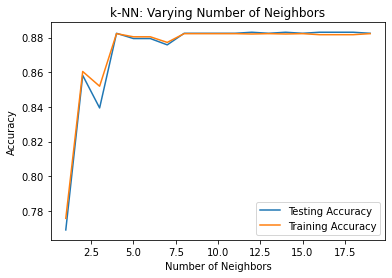

In [133]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors,test_scores,label='Testing Accuracy')
plt.plot(neighbors,train_scores,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# As shown in the graph below, we would pick n = 4

In [134]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
y_pred = knn.predict(X_test)
print('The KNN model accuracy is {}'.format(score))
print('Total number of predicted diabetes is {}'.format(sum(y_pred)))

The KNN model accuracy is 0.8824242424242424
Total number of predicted diabetes is 127.0


In [135]:
Y_pred_prob = knn.predict_proba(X_test)[:,1]
Y_pred_prob = pd.DataFrame({'Prob':Y_pred_prob})

X_test.reset_index(inplace=True)
Final = pd.concat([X_test,Y_pred_prob],axis=1)
Final = Final.merge(Patient,right_index=True,left_on=['index'])
Final[['PatientGuid','Prob','DMIndicator']]

,PatientGuid,Prob,DMIndicator
0,72B72E39-9851-461A-8787-6E8C5FF2EEC3,0.00,0.0
1,E765D0DE-248A-4E00-9C96-56CFEEE3689B,0.00,0.0
2,DA7E789F-1988-4290-AA81-7399F65A6D94,0.00,0.0
3,CA8D8EE1-302F-4B36-AE0D-4A6468540F58,0.50,0.0
4,5B1CD779-2C80-431C-8307-6BA5CBBB964C,0.00,0.0
...,...,...,...
1645,0844D0AC-020E-42E0-9DDE-13E66BE18A24,0.00,0.0
1646,58C5EF07-7F0A-4133-8ACA-06C198F77F90,1.00,1.0
1647,DFFE5EFD-7DB4-44C7-9F3A-38D45F6A5594,0.50,0.0
1648,53EA7F3C-22F8-4247-BE0E-66DEA70B7728,0.25,0.0


### Calculate Brier Score

In [136]:
y_prob = np.array(Final['Prob'])
y_prob
brier_score_loss(y_test,y_prob)

0.12825757575757576

## 3. Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

X = Patient[['Age','Gender','BMI','Gender','Med1','Med2','Med3','Med4','Med5']]
y = Patient[['DMIndicator']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=22,stratify=y)

In [138]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
score = rf.score(X_test,y_test)
y_pred = rf.predict(X_test)
print("The accuracy of the Random Tree Classifier is {}".format(score))
print("Total number of predicted diabetes is {}".format(sum(y_pred)))

The accuracy of the Random Tree Classifier is 0.8824242424242424
Total number of predicted diabetes is 127.0


In [139]:
Y_pred_prob = rf.predict_proba(X_test)[:,1]
Y_pred_prob = pd.DataFrame({'Prob':Y_pred_prob})

X_test.reset_index(inplace=True)
Final = pd.concat([X_test,Y_pred_prob],axis=1)
Final = Final.merge(Patient,right_index=True,left_on=['index'])
Final[['PatientGuid','Prob','DMIndicator']]

,PatientGuid,Prob,DMIndicator
0,72B72E39-9851-461A-8787-6E8C5FF2EEC3,0.021161,0.0
1,E765D0DE-248A-4E00-9C96-56CFEEE3689B,0.021161,0.0
2,DA7E789F-1988-4290-AA81-7399F65A6D94,0.185485,0.0
3,CA8D8EE1-302F-4B36-AE0D-4A6468540F58,0.174652,0.0
4,5B1CD779-2C80-431C-8307-6BA5CBBB964C,0.185485,0.0
...,...,...,...
1645,0844D0AC-020E-42E0-9DDE-13E66BE18A24,0.000301,0.0
1646,58C5EF07-7F0A-4133-8ACA-06C198F77F90,1.000000,1.0
1647,DFFE5EFD-7DB4-44C7-9F3A-38D45F6A5594,0.432929,0.0
1648,53EA7F3C-22F8-4247-BE0E-66DEA70B7728,0.137901,0.0


### Calculate Brier Score

In [140]:
y_prob = np.array(Final['Prob'])
y_prob
brier_score_loss(y_test,y_prob)

0.09815143234038057

## Predict Output for Test Data Using Logistic Regression

In [141]:
X = Patient[['Age','Gender','BMI','Gender','Med1','Med2','Med3','Med4','Med5']]
y = Patient[['DMIndicator']]

logreg_final = LogisticRegression()
logreg_final.fit(X,y)

x = test_data[['Age','Gender','BMI','Gender','Med1','Med2','Med3','Med4','Med5']]

test_data['Probability'] = logreg_final.predict_proba(x)[:,1]

In [142]:
test_data

,index,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,Smoking,BMI,Age,Med1,Med2,Med3,Med4,Med5,Probability
0,6600,027AC271-0852-4DDD-99C2-A74FE50066E0,1,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.081735
1,6601,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,1,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.231524
2,6602,1F4D1486-7632-4576-AC92-A760680D1DC9,0,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.245029
3,6603,0F6AD971-F133-4BD7-B508-A76788D9C46C,0,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.204463
4,6604,1E23496C-7AAF-4A91-AAF4-A769BD439E67,1,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.069648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,9943,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A,1,1978,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.047492
3344,9944,5845977A-3014-4301-92B3-FFF0A2EBBAD2,1,1986,WA,EADEC07A-9901-411F-BBE3-04376029E1E8,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.018262
3345,9945,F948403A-ABE6-496D-B37D-FFF9A9D79767,1,1955,CA,57B6F75F-CF0A-4225-BAD0-8222A7D4B489,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.167123
3346,9946,F764BC86-0CFA-4661-8D84-FFFA8E2B6080,1,1960,CA,1A69F223-8409-4FDC-A26C-114677D2D4C3,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.117888


In [147]:
test_data[['PatientGuid','Probability']].to_csv('/Users/Xingkang/Desktop/Prediction Results.csv',index=False)